In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, WhiteKernel, RationalQuadratic
import itertools as it
from itertools import combinations

## Load the Data

In [11]:
# File paths
input_file_path = "/Users/macponcho/a_IMPERIAL_COLLEGE/CAPSTONE Project - Black Box optimization/initial_data/function_4/initial_inputs.npy"
output_file_path = "/Users/macponcho/a_IMPERIAL_COLLEGE/CAPSTONE Project - Black Box optimization/initial_data/function_4/initial_outputs.npy"

# Load the data
inputs = np.load(input_file_path)
outputs = np.load(output_file_path)

# Convert to pandas DataFrame for easier manipulation and analysis
df = pd.DataFrame(inputs, columns=[f'Input_{i+1}' for i in range(inputs.shape[1])])
df['Output'] = outputs

df

,Input_1,Input_2,Input_3,Input_4,Output
0,0.896981,0.725628,0.175404,0.701694,-22.108288
1,0.889356,0.499588,0.539269,0.508783,-14.601397
2,0.250946,0.033693,0.145380,0.494932,-11.699932
3,0.346962,0.006250,0.760564,0.613024,-16.053765
4,0.124871,0.129770,0.384400,0.287076,-10.069633
5,0.801303,0.500231,0.706645,0.195103,-15.487083
6,0.247708,0.060445,0.042186,0.441324,-12.681685
7,0.746702,0.757092,0.369353,0.206566,-16.026400
8,0.400665,0.072574,0.886768,0.243842,-17.049235
9,0.626071,0.586751,0.438806,0.778858,-12.741766


In [12]:
#Adicion de datos conforme el concurso ha avanzado

#Datos pre-competencia que aparecieron
new_data_0=pd.DataFrame([{'Input_1':0.111111,'Input_2':0.111111,'Input_3':0.111111,'Input_4':0.111111,'Output':-16.709552}]) 
df=pd.concat([df,new_data_0],ignore_index=True)

# 5 may
new_data=[0.428947,0.381579,0.381579,0.381579,0.228123726269423]
df.loc[len(df)] = new_data

new_data=[0.05,0.381579,0.95,0.95,-30.6637897819745]
df.loc[len(df)] = new_data

#14 may
df.loc[len(df)]=[0.428947,0.381579,0.334211,0.428947,0.251120234848489]
df.loc[len(df)]=[0.05,0.95,0.95,0.05,-34.1974498021655]
df.loc[len(df)]=[9.99999e-01,1.00000e-06,1.00000e-06,1.00000e-06,-32.809900535241]

#17 may
df.loc[len(df)]=[0.473684,0.473684,0.421053,0.473684,-2.64188156309587]

#17 may
df.loc[len(df)]=[0.263158,0.368421,0.263158,0.31579,-2.81220910371038]
df.loc[len(df)]=[0.499999,0.447368,0.300001,0.415789,-2.11145986221993]

#2 jun
df.loc[len(df)]=[0.421053,0.368421,0.368421,0.421053,0.692066924633068] #**new max

#13 jun
df.loc[len(df)]=[0.403448,0.382759,0.368966,0.417241,0.495215816]
df.loc[len(df)]=[0.396552,0.375862,0.389655,0.424138,0.316251916]

#18 jun
df.loc[len(df)]=[0.410257,0.384616,0.384616,0.410257,0.34766361139544]
df.loc[len(df)]=[0.402564,0.382051,0.376923,0.417949,0.39607693213614]


#Print
df

,Input_1,Input_2,Input_3,Input_4,Output
0,0.896981,0.725628,0.175404,0.701694,-22.108288
1,0.889356,0.499588,0.539269,0.508783,-14.601397
2,0.250946,0.033693,0.145380,0.494932,-11.699932
3,0.346962,0.006250,0.760564,0.613024,-16.053765
4,0.124871,0.129770,0.384400,0.287076,-10.069633
5,0.801303,0.500231,0.706645,0.195103,-15.487083
6,0.247708,0.060445,0.042186,0.441324,-12.681685
7,0.746702,0.757092,0.369353,0.206566,-16.026400
8,0.400665,0.072574,0.886768,0.243842,-17.049235
9,0.626071,0.586751,0.438806,0.778858,-12.741766


# Function 4: Fast, but Inaccurate Modelling

### This example is for a particular business relying heavily on online sales. It can run very accurate calculations to figure out what is the optimal placement of their product across warehouses. Unfortunately, the calculations are extremely expensive (computationally) to run, so they can only do it once every two weeks. Instead, they propose using a machine learning model which approximates the solution quickly (in a few hours). The model has four hyper-parameters you need to tune, and the output corresponds to the difference between the expensive calculation, and the model. Since you are modelling a dynamical system, expect a lot of local optima!

## Data exploration

In [4]:
# Display basic statistics
print("Basic Statistical Summary:")
print(df.describe())

# Check for any missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

Basic Statistical Summary:
         Input_1    Input_2    Input_3    Input_4     Output
count  44.000000  44.000000  44.000000  44.000000  44.000000
mean    0.491498   0.447793   0.444784   0.441828 -14.463121
std     0.284305   0.281333   0.260198   0.274985  10.426513
min     0.037825   0.000001   0.000001   0.000001 -34.197450
25%     0.260105   0.200495   0.257712   0.234523 -20.519195
50%     0.425000   0.438070   0.384508   0.419501 -14.152072
75%     0.734263   0.665373   0.692025   0.635191  -6.032953
max     0.999999   0.950000   0.950000   0.999483   0.692067

Missing values in the dataset:
Input_1    0
Input_2    0
Input_3    0
Input_4    0
Output     0
dtype: int64


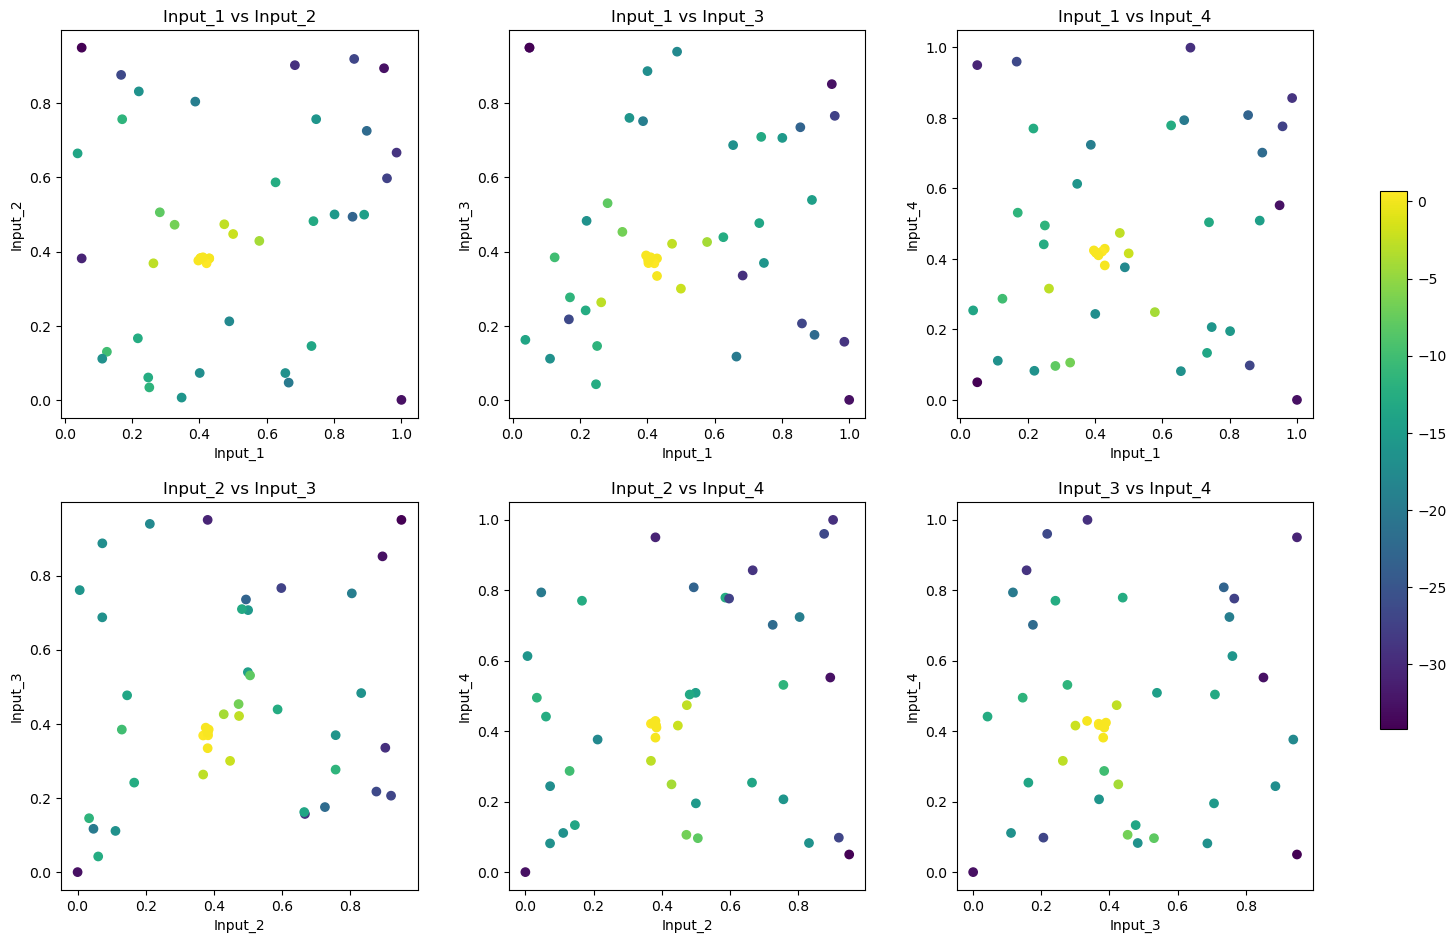

In [5]:
from itertools import combinations

# Calculate all pair combinations of input columns
input_columns = df.columns[df.columns.str.startswith('Input')]  # Select only columns that start with 'Input'
pair_combinations = list(combinations(input_columns, 2))  # Get all combinations of Input columns taken 2 at a time

# Determine the grid size for subplots
num_plots = len(pair_combinations)
num_cols = 3  # Set number of columns in the subplot grid
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate rows needed, round up

# Create a figure with subplots in a grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 5))  # Adjust figure size as needed
fig.tight_layout(pad=4.0)  # Add spacing between plots

# Flatten axes array for easier iteration if it's 2D
axes = axes.flatten()

# Plotting each combination in the grid
for i, (x_col, y_col) in enumerate(pair_combinations):
    ax = axes[i]
    scatter = ax.scatter(df[x_col], df[y_col], c=df['Output'], cmap='viridis')
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_title(f'{x_col} vs {y_col}')

# Add a colorbar to the last plot
fig.colorbar(scatter, ax=axes, orientation='vertical', fraction=.02)

# Turn off axes for any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.show()

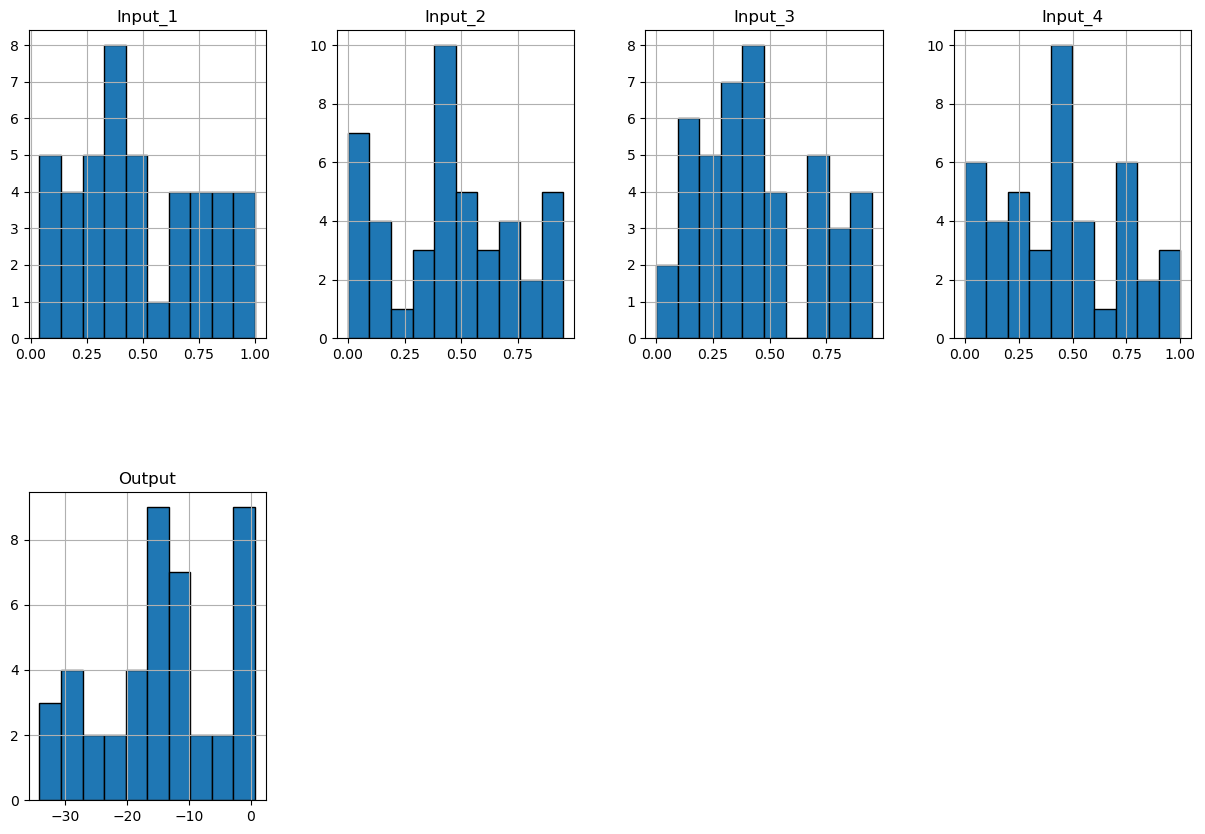

In [6]:
# Plot histograms for each column to understand distributions
df.hist(bins=10, figsize=(15, 10), layout=(-1, 4), edgecolor='black')
plt.subplots_adjust(hspace=0.5)
plt.show()

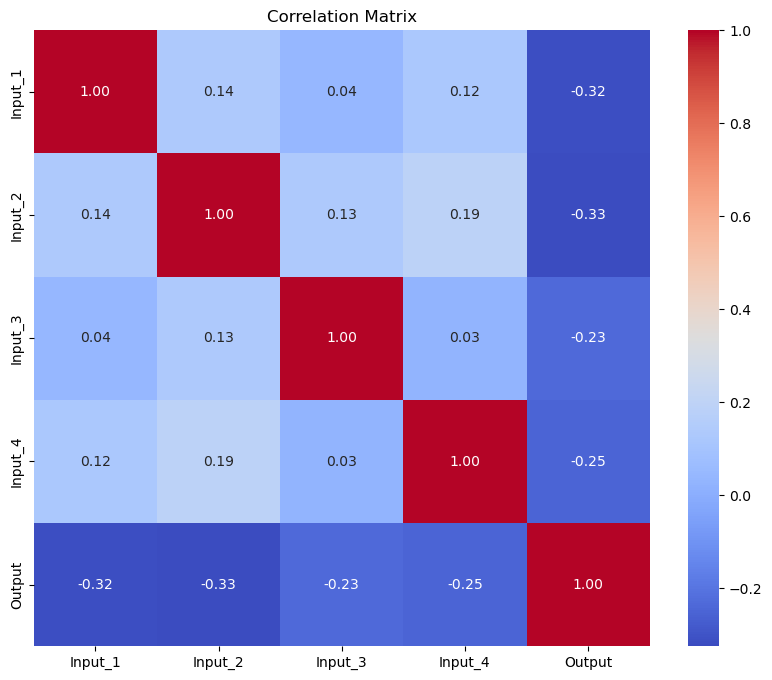

In [7]:
# Compute the correlation matrix
corr = df.corr()

# Generate a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix')
plt.show()

/Users/macponcho/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


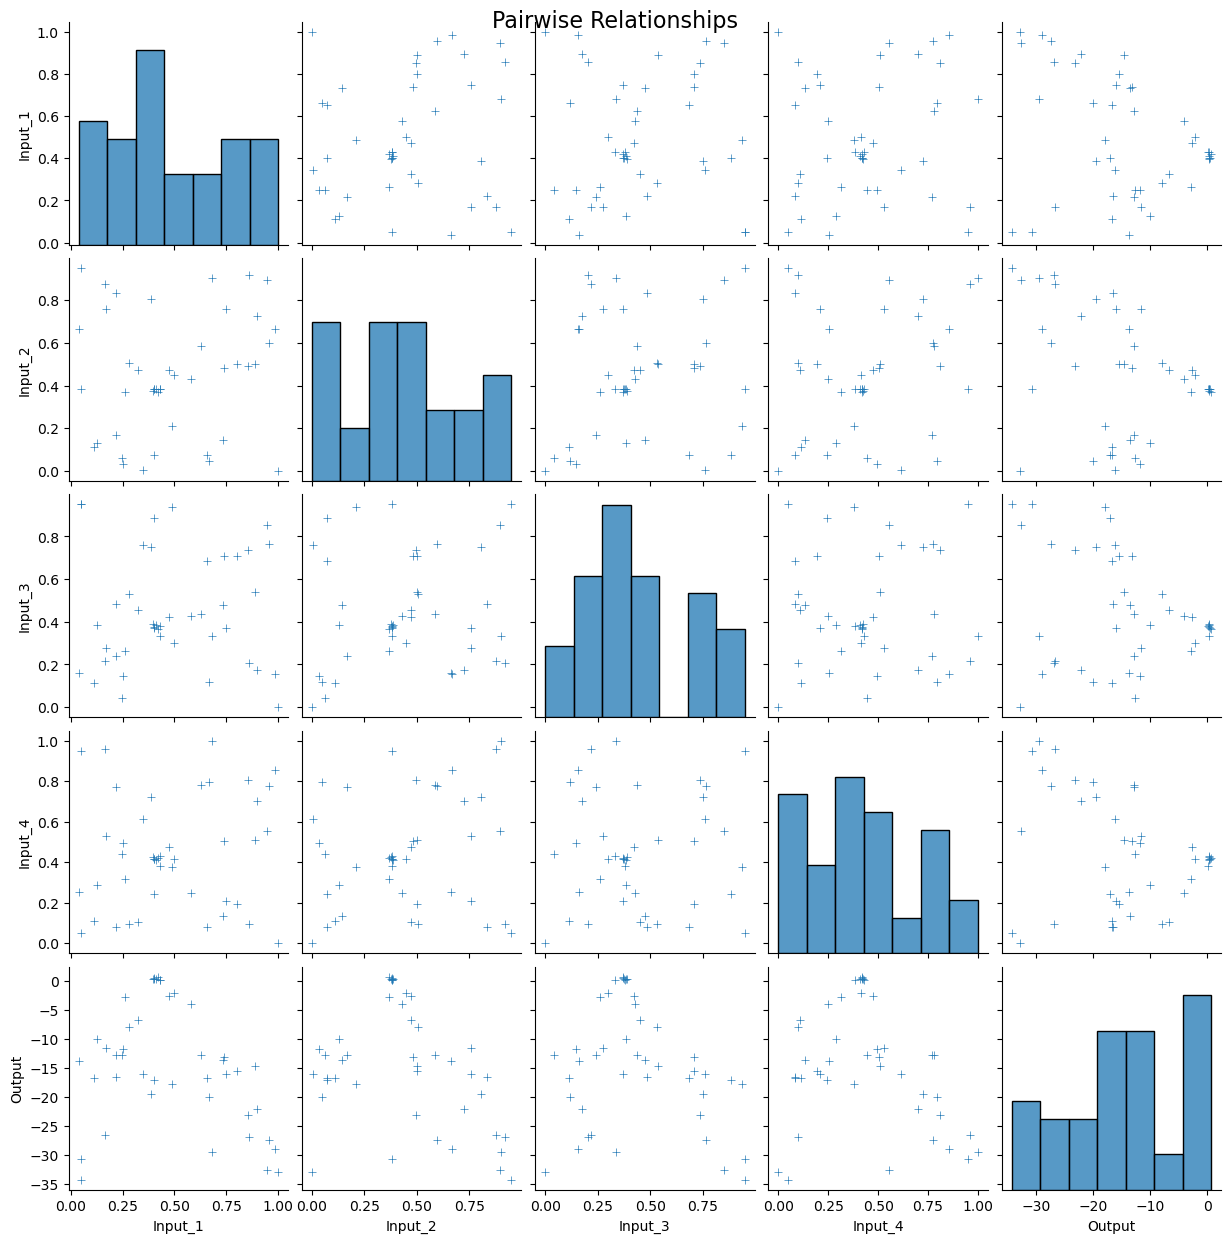

In [8]:
# Use pairplot to visualize the relationships between variables
sns.pairplot(df, kind='scatter', diag_kind='hist', markers='+')
plt.suptitle('Pairwise Relationships', verticalalignment='baseline', fontsize=16)
plt.show()

## Definir las variables

In [9]:
from sklearn.preprocessing import StandardScaler
import torch

In [20]:
X = df.drop(columns=['Output'])
y = df[['Output']] 

# O estandarizamos datos
scaler = StandardScaler()
y = torch.tensor(scaler.fit_transform(y)).float()


In [21]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, WhiteKernel, RationalQuadratic
import itertools as it

# Parameters of the model
#****************************************
noise_assumption = 1e-4 # noise assumption, a hyper-parameter (default 1e-10)

rbf_lengthscale = 0.8 # lengthscale parameter (default = 1), comenzaremos con 0.2 y luego ir descendiendo a 0.1 o menos
   #ARD. Automatic relevance determination
    
# define kernel of GP
kernel = RBF(length_scale=rbf_lengthscale, length_scale_bounds='fixed')

# Define a kernel with both smooth and rough components, and noise handling
#kernel = Matern(length_scale=1, nu=1.5) + WhiteKernel(noise_level=0.1) + RationalQuadratic(length_scale=1.0, alpha=0.1)
#kernel=kernel + WhiteKernel(noise_level=1e-5) #ESPECIAL PARA FUNCION 1 POR LAS ANOMALIAS
#kernel = Matern(length_scale=[0.1, 0.1, 0.1], nu=1.5, length_scale_bounds=(0.01, 1), ARD=True)

#Grid:
GG=40    #Numero de datos para cada variable en el Grid.  
dim=4     #Numero de Inputs
#******************************************************

x1 = np.linspace(0.300001, .499999, GG)     #Genera la primer variable. RANGO DE EXPLORACION
X_grid = np.fromiter(it.chain(*it.product(x1, repeat=dim)), dtype=float).reshape(-1,dim) #Genera todas las variables
# Convert X_grid into a DataFrame with meaningful names
X_grid_df = pd.DataFrame(X_grid, columns=X.columns)

# Fit the Gaussian process - Surrogate model
GPR_model = GaussianProcessRegressor(kernel = kernel, alpha=noise_assumption)
GPR_model.fit(X, y)

#Genera la funcion del Surrogate model para cada punto del grid
mean, std = GPR_model.predict(X_grid_df, return_std = True)

## Generar acquisition function, maximizar y encontrar el siguiente query

In [22]:
#Acquisition function
#######################################################

beta = 1.96
acquisition_function = mean + beta * std

#######################################################

idx_max = np.argmax(acquisition_function) #en que index esta el maximo del acquisitonm function
next_query = X_grid[idx_max] #que valores tienes los inputs en este maximo estimado

# Formatting the single row
formatted_row = '-'.join(format(x, ".6f") for x in next_query)
print(f"[{formatted_row}]")

[0.412820-0.310257-0.392308-0.428205]


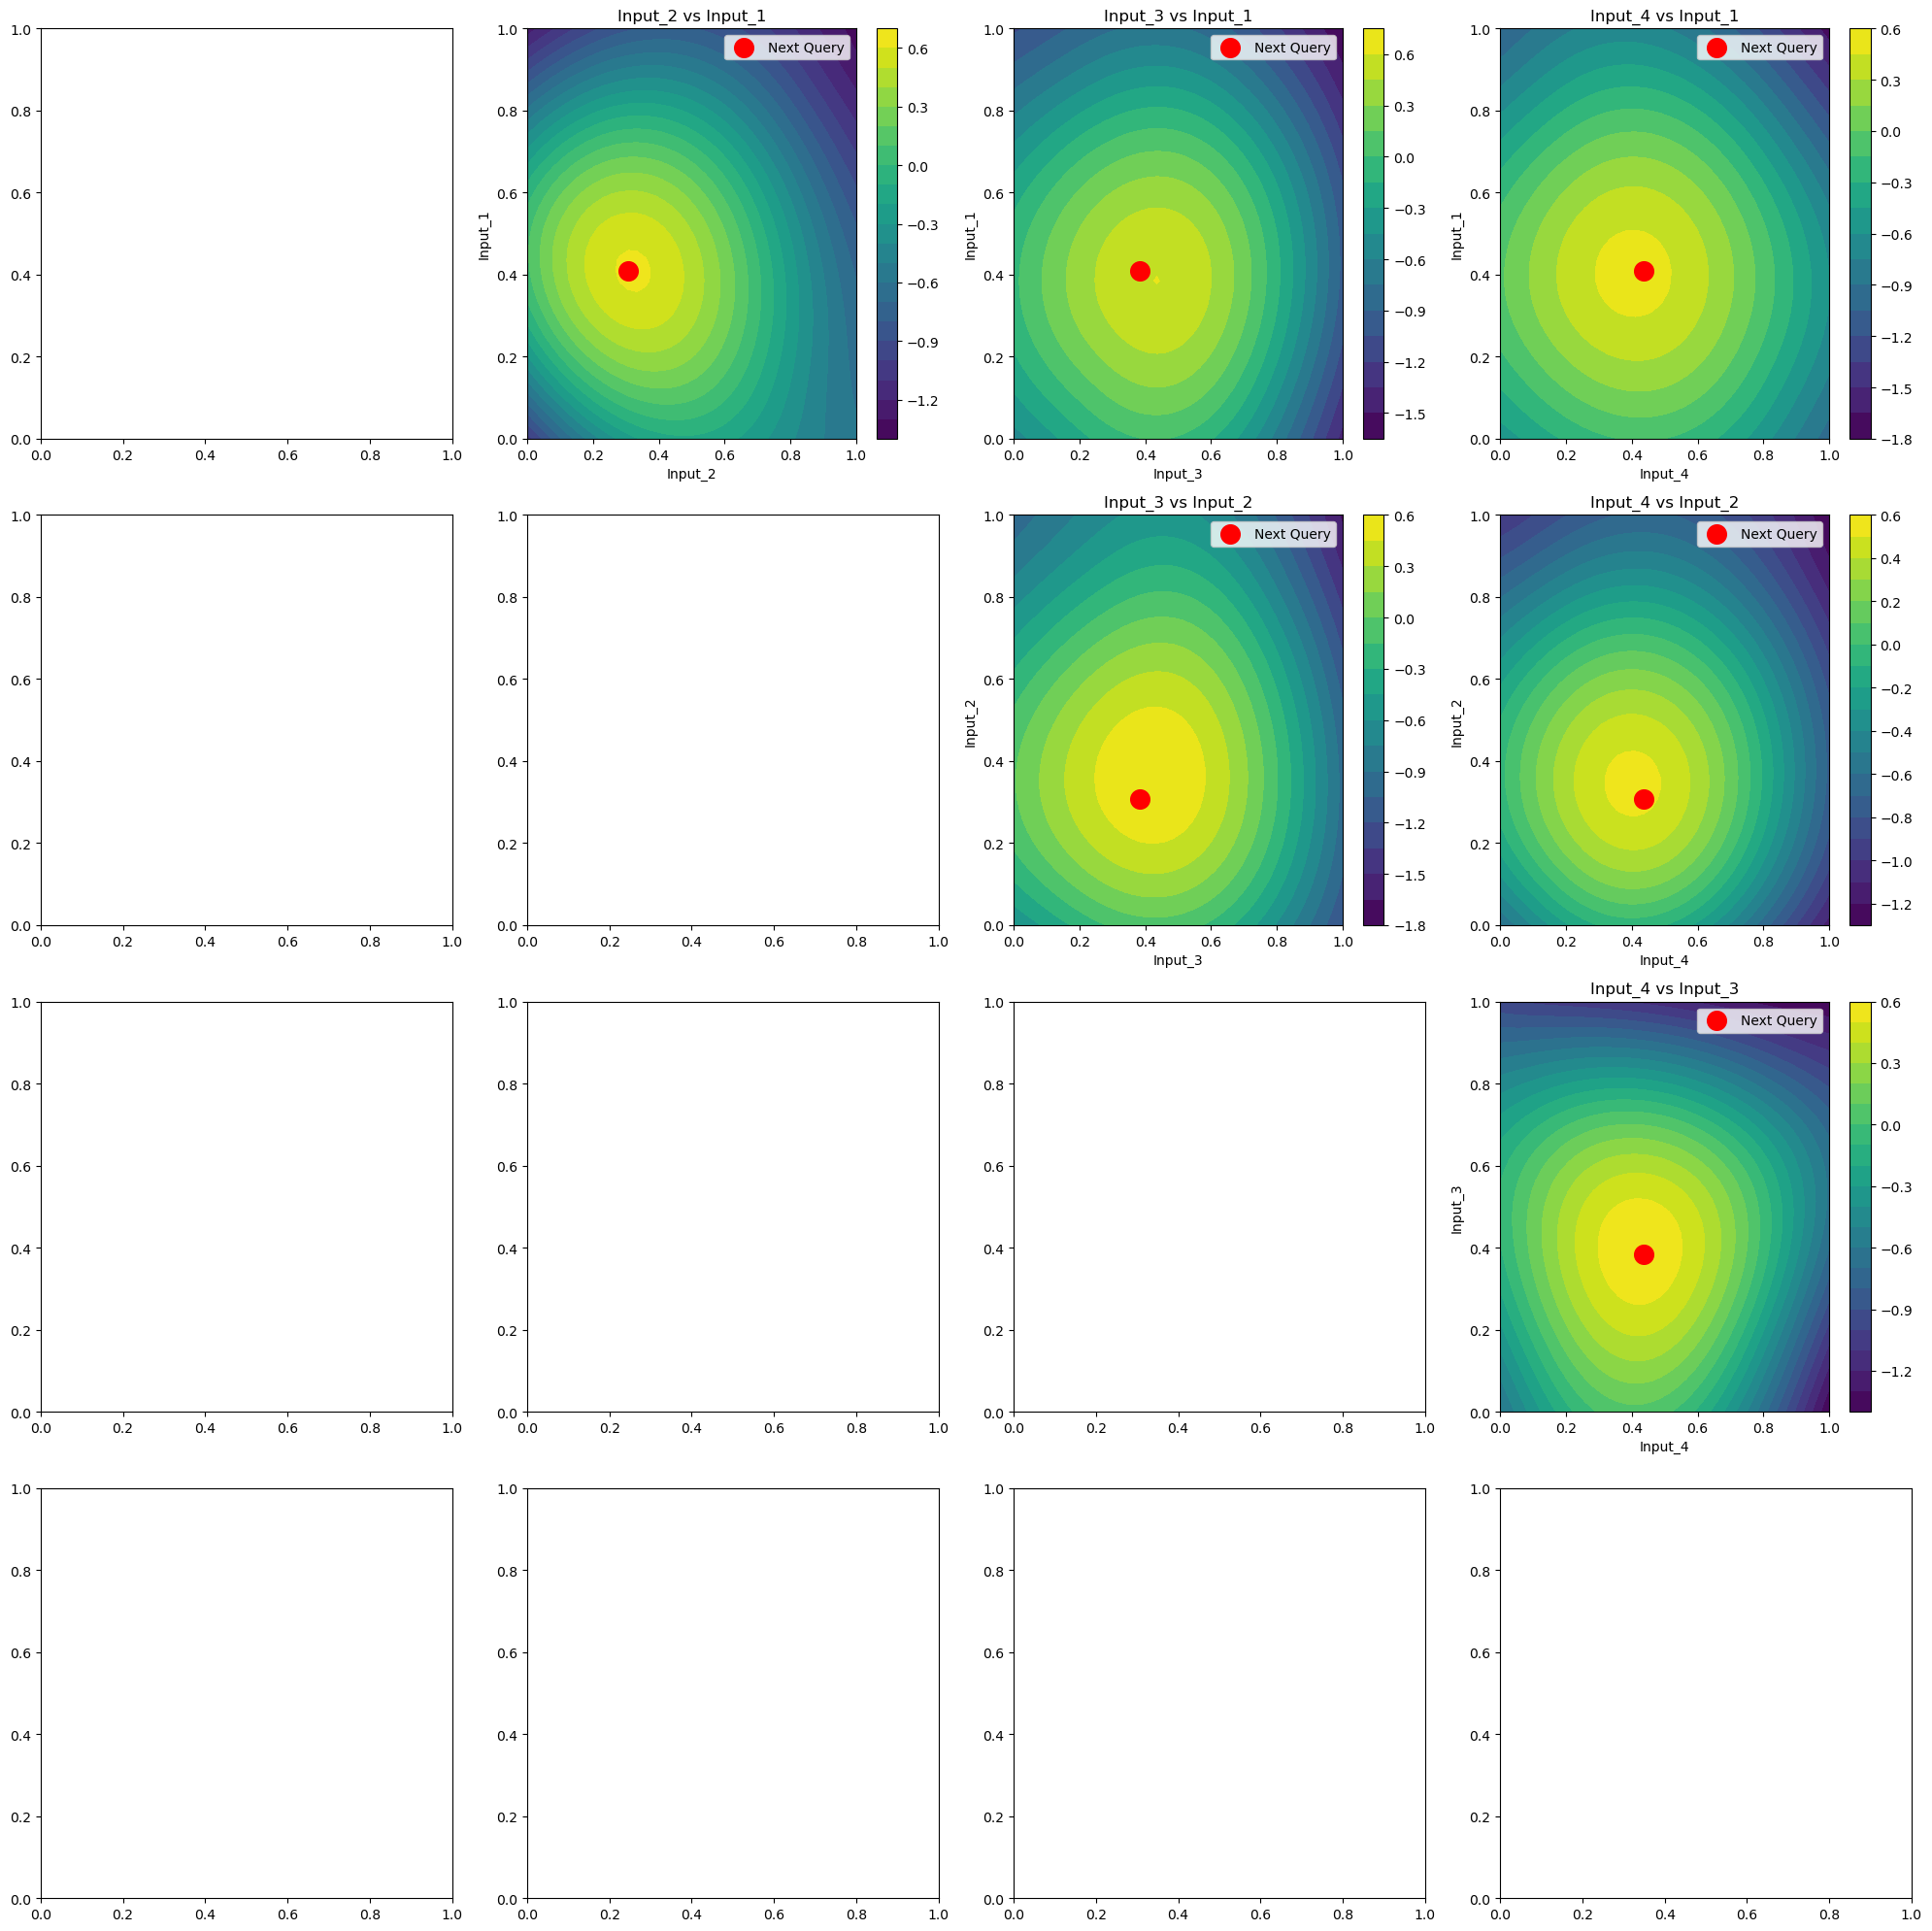

In [13]:
input_labels = X.columns.tolist()  # Correctly fetching input labels from DataFrame

# Create figure for plotting
fig, axes = plt.subplots(dim, dim, figsize=(20, 20))

for i, j in combinations(range(dim), 2):
    ax = axes[i, j] if dim > 1 else axes[max(i, j)]  # Correct indexing for subplot
    reshaped_acq_func = acquisition_function.reshape([GG]*dim)

    # Reduce all dimensions except for i and j
    axes_to_avg = tuple(k for k in range(dim) if k not in [i, j])
    reshaped_acq_func = np.mean(reshaped_acq_func, axis=axes_to_avg)
    
    # Create meshgrid for the contour plot
    x, y = np.meshgrid(np.linspace(0, 1, GG), np.linspace(0, 1, GG))
    cp = ax.contourf(x, y, reshaped_acq_func, cmap='viridis', levels=20)
    fig.colorbar(cp, ax=ax)
    
    # Plot the location of the next query: Ensure axis alignment is correct
    # Swap the indices for x and y based on their respective dimensions
    next_query_x = next_query[j]  # Using j for x-axis
    next_query_y = next_query[i]  # Using i for y-axis

    # Convert to plot scale
    next_query_x_idx = int(next_query_x * (GG - 1))
    next_query_y_idx = int(next_query_y * (GG - 1))

    # Plot the location of the next query
    ax.scatter(next_query_x, next_query_y, color='red', s=200, label='Next Query')
    ax.legend()

    ax.set_title(f'{input_labels[j]} vs {input_labels[i]}')  # Ensure correct title
    ax.set_xlabel(input_labels[j])  # x-axis should use j
    ax.set_ylabel(input_labels[i])  # y-axis should use i

plt.tight_layout()
plt.show()


In [14]:
#Acquisition function variando parametros

#######################################################
beta = 1.96
acquisition_function = mean + beta * std
idx_max = np.argmax(acquisition_function) #en que index esta el maximo del acquisitonm function
next_query = X_grid[idx_max] #que valores tienes los inputs en este maximo estimado
formatted_row = '-'.join(format(x, ".6f") for x in next_query)
print("Beta 1.96",f"[{formatted_row}]")
#######################################################
beta = 0.00000001
acquisition_function = mean + beta * std
idx_max = np.argmax(acquisition_function) #en que index esta el maximo del acquisitonm function
next_query = X_grid[idx_max] #que valores tienes los inputs en este maximo estimado
formatted_row = '-'.join(format(x, ".6f") for x in next_query)
print("Beta casi CERO",f"[{formatted_row}]")
#######################################################
beta = 2.6
acquisition_function = mean + beta * std
idx_max = np.argmax(acquisition_function) #en que index esta el maximo del acquisitonm function
next_query = X_grid[idx_max] #que valores tienes los inputs en este maximo estimado
formatted_row = '-'.join(format(x, ".6f") for x in next_query)
print("Beta 2.6",f"[{formatted_row}]")
#######################################################
acquisition_function = std
idx_max = np.argmax(acquisition_function) #en que index esta el maximo del acquisitonm function
next_query = X_grid[idx_max] #que valores tienes los inputs en este maximo estimado
formatted_row = '-'.join(format(x, ".6f") for x in next_query)
print("ONLY std",f"[{formatted_row}]")
#######################################################

Beta 1.96 [0.410257-0.307693-0.384616-0.435898]
Beta casi CERO [0.410257-0.307693-0.384616-0.435898]
Beta 2.6 [0.410257-0.307693-0.384616-0.435898]
ONLY std [0.999999-0.000001-0.999999-0.999999]


# 28 Apr. Ask 1. [0.050000-0.381579-0.950000-0.950000]

- Explorando los extremos

#### 4 May
Vamos a volver a submit el primero y voy a submit uno mas.
Pr si las dudas, voy a subir el original como segundo submit.
- [0.428947-0.381579-0.381579-0.381579]
- [0.050000-0.381579-0.950000-0.950000]

#### 10 may
Inputs 1,2 y 4 de mayor correlacion, es negativa. Entre mas pequeños, pareciera que es mejor

- Beta 2.6 [0.428947-0.381579-0.334211-0.428947] - explora alrededor del maximo
- ONLY std [0.050000-0.950000-0.950000-0.050000]
- Beta 2.6 [0.999999-0.000001-0.000001-0.000001] con length .2

#### 14 may

- [0.473684-0.473684-0.421053-0.473684] length .3
- [0.999999-0.000001-0.999999-0.999999] length .2
***** Vamos por [0.473684-0.473684-0.421053-0.473684]

#### 17 may

- [0.263158-0.368421-0.263158-0.315790] lenght 1
- [0.473684-0.315790-0.315790-0.368421] y only std [0.999999-0.000001-0.999999-0.999999]length .3
- [0.499999-0.447368-0.300001-0.415789] con rango acotado de .3 a .5
- [0.526316-0.368421-0.210527-0.315790] length .2
- Con LOG Beta 1.96 [0.421053-0.368421-0.315790-0.421053], Beta 2.6 [0.421053-0.421053-0.263158-0.421053], Beta 5 : [0.473684-0.526316-0.000001-0.368421]
***** Vamos por [0.263158-0.368421-0.263158-0.315790] y [0.499999-0.447368-0.300001-0.415789]

#### 1 jun
PUROS DATOS NORMALIZADOS AHORA
- **Len 1
- Beta 1.96 [0.421053-0.368421-0.368421-0.421053], Beta casi CERO [0.421053-0.368421-0.368421-0.421053]
- **Len .2
- Beta 1.96 Beta 1.96 [0.210527-0.421053-0.368421-0.473684], Beta casi CERO [0.368421-0.368421-0.315790-0.421053]
- ** LOG LIKELIHOOD
- Beta 1.96 [0.421053-0.368421-0.368421-0.421053], Beta casi CERO [0.421053-0.368421-0.368421-0.421053
- ** LOG LIKELIHOOD con DATA STANDARIZADA
- Beta 1.96 [0.421053-0.368421-0.368421-0.421053]**
- Beta casi CERO [0.421053-0.368421-0.368421-0.421053]

- ****** VAMOS POR [0.421053-0.368421-0.368421-0.421053]** new max

#### 7 jun
Beta 1.96 [0.413793-0.379311-0.379311-0.413793]
Beta casi CERO [0.413793-0.379311-0.379311-0.413793]
Beta 2.6 [0.413793-0.379311-0.379311-0.413793]
- **** Afinando el rango de exploracion de 0.3 a 0.5
- Beta 1.96 [0.403448-0.382759-0.368966-0.417241]+
- Beta casi CERO [0.410345-0.382759-0.368966-0.410345]
- Beta 2.6 [0.403448-0.382759-0.375862-0.417241]
- Beta 5 [[0.396552-0.375862-0.389655-0.424138]++
- query EI: [0.300001-0.499999-0.499999-0.499999]
- query PI: [0.300001-0.499999-0.499999-0.499999]

- *** VAMOS POR [0.403448-0.382759-0.368966-0.417241] Y [0.396552-0.375862-0.389655-0.424138]

#### 13 jun

- Lg lik normal
- Beta 1.96 [0.410257-0.384616-0.384616-0.410257]
- Beta casi CERO [0.410257-0.384616-0.384616-0.410257]
- Beta 2.6 [0.410257-0.384616-0.384616-0.410257]

- en rango 0.3- 0.5
- Beta 1.96 [0.402564-0.376923-0.382051-0.417949]
- Beta casi CERO [0.402564-0.382051-0.376923-0.417949]
- Beta 2.6 [0.402564-0.376923-0.382051-0.417949]

- *** VAMOS POR [0.410257-0.384616-0.384616-0.410257] y [0.402564-0.382051-0.376923-0.417949]

## Probando optimizacion de parametros LOG LIKELIHOOD

In [23]:
import numpy as np
import pandas as pd
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, WhiteKernel
import itertools as it
from skopt import gp_minimize
from skopt.space import Real
from skopt.utils import use_named_args
from skopt.acquisition import gaussian_lcb, gaussian_ei, gaussian_pi
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress specific warnings
warnings.filterwarnings('ignore', category=ConvergenceWarning)

X = df.drop(columns=['Output'])
y = df[['Output']] 

# O estandarizamos datos
scaler = StandardScaler()
y = torch.tensor(scaler.fit_transform(y)).float()

# Define the search space for Bayesian Optimization
space = [
    Real(1e-3, 1e-0, name='length_scale'),
    Real(1e-10, 1e-2, name='noise_level')
]

# Evaluation function (Log-Likelihood)
def evaluate_model(length_scale, noise_level):
    # Define kernel with given length scale
    kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=length_scale, length_scale_bounds='fixed') + WhiteKernel(noise_level=noise_level)
    GPR_model = GaussianProcessRegressor(kernel=kernel, alpha=noise_level)
    GPR_model.fit(X, y)
    log_likelihood = GPR_model.log_marginal_likelihood()
    return -log_likelihood

# Use the search space in the objective function
@use_named_args(space)
def objective(**params):
    return evaluate_model(**params)

# Perform Bayesian Optimization
res = gp_minimize(objective, space, n_calls=50, n_initial_points=10, random_state=33)

# Get the best parameters
best_length_scale = res.x[0]
best_noise_level = res.x[1]

print(f"Best length scale: {best_length_scale}")
print(f"Best noise level: {best_noise_level}")


Best length scale: 0.858106211973428
Best noise level: 0.0009547924366386079


In [24]:
# Define the best kernel
best_kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=best_length_scale, length_scale_bounds='fixed') + WhiteKernel(noise_level=best_noise_level)

# Fit the Gaussian Process with the best parameters
GPR_model_best = GaussianProcessRegressor(kernel=best_kernel, alpha=best_noise_level)
GPR_model_best.fit(X, y)

# Predictions using the surrogate model
mean, std = GPR_model_best.predict(X_grid_df, return_std=True)

# Acquisition function
beta = 1.96
acquisition_function = mean + beta * std

# Find the next query point
idx_max = np.argmax(acquisition_function)
next_query = X_grid[idx_max]

# Formatting the single row
formatted_row = '-'.join(format(x, ".6f") for x in next_query)
print(f"Next query point with Beta 1.96: [{formatted_row}]")
print("     ")


Next query point with Beta 1.96: [0.402564-0.376923-0.382051-0.417949]
     


In [25]:
#Acquisition function variando parametros

#######################################################
beta = 1.96
acquisition_function = mean + beta * std
idx_max = np.argmax(acquisition_function) #en que index esta el maximo del acquisitonm function
next_query = X_grid[idx_max] #que valores tienes los inputs en este maximo estimado
formatted_row = '-'.join(format(x, ".6f") for x in next_query)
print("Beta 1.96",f"[{formatted_row}]")
#######################################################
beta = 0.00000001
acquisition_function = mean + beta * std
idx_max = np.argmax(acquisition_function) #en que index esta el maximo del acquisitonm function
next_query = X_grid[idx_max] #que valores tienes los inputs en este maximo estimado
formatted_row = '-'.join(format(x, ".6f") for x in next_query)
print("Beta casi CERO",f"[{formatted_row}]")
#######################################################
beta = 2.6
acquisition_function = mean + beta * std
idx_max = np.argmax(acquisition_function) #en que index esta el maximo del acquisitonm function
next_query = X_grid[idx_max] #que valores tienes los inputs en este maximo estimado
formatted_row = '-'.join(format(x, ".6f") for x in next_query)
print("Beta 2.6",f"[{formatted_row}]")
#######################################################
acquisition_function = std
idx_max = np.argmax(acquisition_function) #en que index esta el maximo del acquisitonm function
next_query = X_grid[idx_max] #que valores tienes los inputs en este maximo estimado
formatted_row = '-'.join(format(x, ".6f") for x in next_query)
print("ONLY std",f"[{formatted_row}]")
#######################################################

Beta 1.96 [0.402564-0.376923-0.382051-0.417949]
Beta casi CERO [0.402564-0.382051-0.376923-0.417949]
Beta 2.6 [0.402564-0.376923-0.382051-0.417949]
ONLY std [0.300001-0.499999-0.499999-0.499999]


In [18]:
# Acquisition function choices

acquisition_function = gaussian_ei(X_grid, model=GPR_model_best, xi=0.01)

# Find the next query point
idx_max = np.argmax(acquisition_function)
next_query = X_grid[idx_max]

# Formatting the single row
formatted_row = '-'.join(format(x, ".6f") for x in next_query)
print(f"query EI: [{formatted_row}]")

# */*******************************************************************************

acquisition_function = gaussian_pi(X_grid, model=GPR_model_best, xi=0.01)

# Find the next query point
idx_max = np.argmax(acquisition_function)
next_query = X_grid[idx_max]

# Formatting the single row
formatted_row = '-'.join(format(x, ".6f") for x in next_query)
print(f"query PI: [{formatted_row}]")

query EI: [0.999999-0.999999-0.999999-0.999999]
query PI: [0.000001-0.179488-0.948717-0.948717]


# New model

In [13]:
import numpy as np
import pandas as pd
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, WhiteKernel
from skopt import gp_minimize
from skopt.space import Real
from skopt.utils import use_named_args
from skopt.acquisition import gaussian_lcb, gaussian_ei, gaussian_pi
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import itertools as it
import warnings
from sklearn.exceptions import ConvergenceWarning
from itertools import combinations

# Suppress specific warnings
warnings.filterwarnings('ignore', category=ConvergenceWarning)

# Assuming df is already loaded with data

X = df.drop(columns=['Output'])
y = df[['Output']]

# Standardize inputs and outputs
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y)

# Define the search space for Bayesian Optimization
space = [
    Real(1e-3, 1e-1, name='length_scale'),
    Real(1e-12, 1e-2, name='noise_level')
]

# Evaluation function (Log-Likelihood)
def evaluate_model(length_scale, noise_level):
    kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=length_scale) + WhiteKernel(noise_level=noise_level)
    GPR_model = GaussianProcessRegressor(kernel=kernel, alpha=noise_level)
    GPR_model.fit(X_scaled, y_scaled)
    log_likelihood = GPR_model.log_marginal_likelihood()
    return -log_likelihood

# Use the search space in the objective function
@use_named_args(space)
def objective(**params):
    return evaluate_model(**params)

# Perform Bayesian Optimization
res = gp_minimize(objective, space, n_calls=50, n_initial_points=10, random_state=32)

# Get the best parameters
best_length_scale = res.x[0]
best_noise_level = res.x[1]

print(f"Best length scale: {best_length_scale}")
print(f"Best noise level: {best_noise_level}")

# Define the best kernel
best_kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=best_length_scale) + WhiteKernel(noise_level=best_noise_level)

# Fit the Gaussian Process with the best parameters
GPR_model_best = GaussianProcessRegressor(kernel=best_kernel, alpha=best_noise_level)
GPR_model_best.fit(X_scaled, y_scaled)

# Flexible grid setup for predictions
def generate_grid(ranges, num_points):
    grid_axes = [np.linspace(start, end, num_points) for start, end in ranges]
    grid = np.array(list(it.product(*grid_axes)))
    return grid

#****
# Define custom ranges for each input
# Modify these ranges as needed
input_ranges = [
    (0.000001, 0.999999),  # Range for Input_1
    (0.000001, 0.999999),  # Range for Input_2
    (0.000001, 0.999999),   # Range for Input_3
    (0.000001, 0.999999)   # Range for Input_4
    # Add more ranges for additional inputs if necessary
]

# Ensure the number of ranges matches the number of inputs
if len(input_ranges) != X.shape[1]:
    raise ValueError("The number of input ranges must match the number of inputs.")

#****   
    
GG = 40  # Number of data points for each variable in the grid
X_grid = generate_grid(input_ranges, GG)

# Convert to DataFrame with appropriate column names
X_grid_df = pd.DataFrame(X_grid, columns=X.columns)
# Scale the grid points
X_grid_scaled = scaler_X.transform(X_grid_df)

# Predictions using the surrogate model
mean_scaled, std_scaled = GPR_model_best.predict(X_grid_scaled, return_std=True)
mean_scaled = mean_scaled.reshape(-1, 1)  # Reshape to 2D array
mean = scaler_y.inverse_transform(mean_scaled).flatten()  # Inverse transform to original scale and flatten to 1D array
std = std_scaled * scaler_y.scale_[0]  # Scale standard deviation appropriately

# Acquisition function: UCB
beta = 1.96
acquisition_function_ucb = mean + beta * std

# Find the next query point (UCB)
idx_max_ucb = np.argmax(acquisition_function_ucb)
next_query_ucb = X_grid[idx_max_ucb]
formatted_row_ucb = '-'.join(format(x, ".6f") for x in next_query_ucb)
print(f"Next query point UCB with Beta {beta}: [{formatted_row_ucb}]")

# Calculate and collect query points
query_points = [
    (next_query_ucb, 'UCB Beta 1.96', 'red', 'o')
]

# Test different beta values for UCB and other acquisition functions
for beta, color, marker in zip([0.01, 1.00, 2.6], ['blue', 'green', 'purple'], ['x', 's', 'd']):
    acquisition_function = mean + beta * std
    idx_max = np.argmax(acquisition_function)
    next_query = X_grid[idx_max]
    query_points.append((next_query, f'UCB Beta {beta}', color, marker))
    formatted_row = '-'.join(format(x, ".6f") for x in next_query)
    print(f"Next query point UCB with Beta {beta}: [{formatted_row}]")

# Use other acquisition functions
acquisition_function_ei = gaussian_ei(X_grid_scaled, model=GPR_model_best, xi=0.01)
idx_max_ei = np.argmax(acquisition_function_ei)
next_query_ei = X_grid[idx_max_ei]
query_points.append((next_query_ei, 'EI', 'orange', 'v'))
formatted_row_ei = '-'.join(format(x, ".6f") for x in next_query_ei)
print(f"Next query point EI: [{formatted_row_ei}]")

acquisition_function_pi = gaussian_pi(X_grid_scaled, model=GPR_model_best, xi=0.01)
idx_max_pi = np.argmax(acquisition_function_pi)
next_query_pi = X_grid[idx_max_pi]
query_points.append((next_query_pi, 'PI', 'cyan', '^'))
formatted_row_pi = '-'.join(format(x, ".6f") for x in next_query_pi)
print(f"Next query point PI: [{formatted_row_pi}]")


Best length scale: 0.006976827503514532
Best noise level: 0.001237098652956016
Next query point UCB with Beta 1.96: [0.410257-0.384616-0.384616-0.410257]
Next query point UCB with Beta 0.01: [0.410257-0.384616-0.384616-0.410257]
Next query point UCB with Beta 1.0: [0.410257-0.384616-0.384616-0.410257]
Next query point UCB with Beta 2.6: [0.410257-0.358975-0.384616-0.435898]
Next query point EI: [0.999999-0.999999-0.999999-0.897435]
Next query point PI: [0.000001-0.179488-0.923076-0.923076]


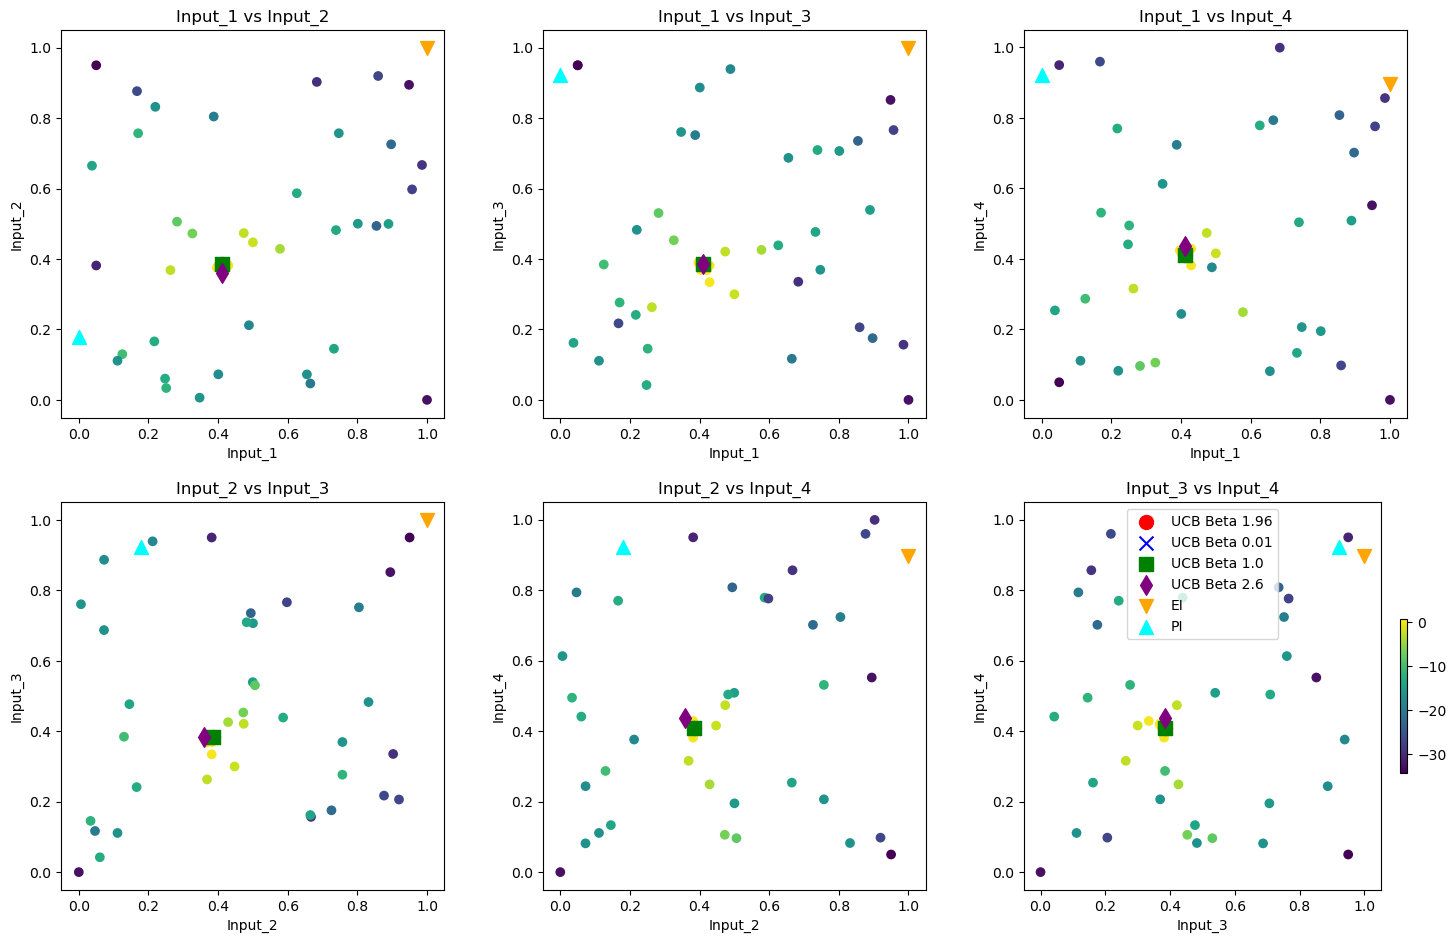

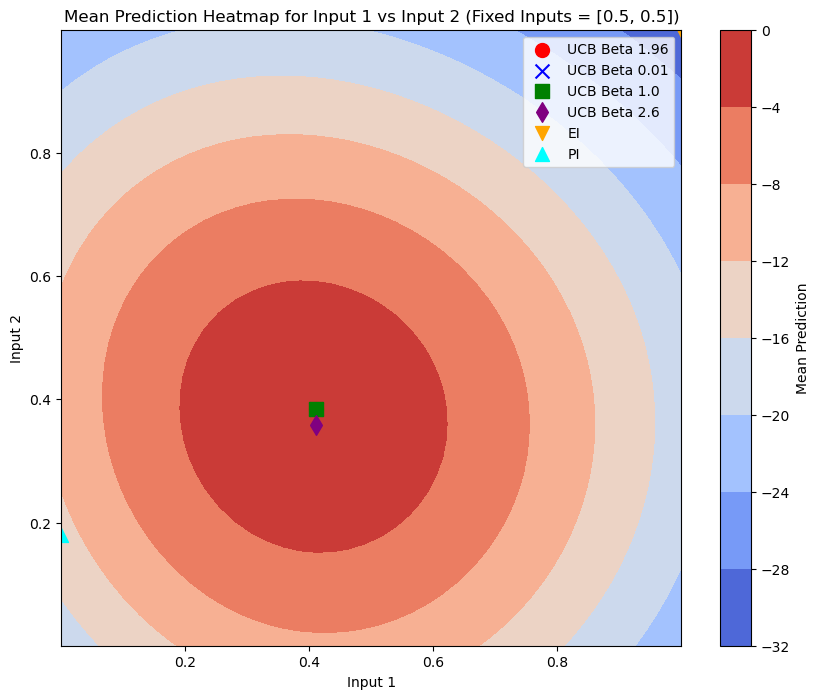

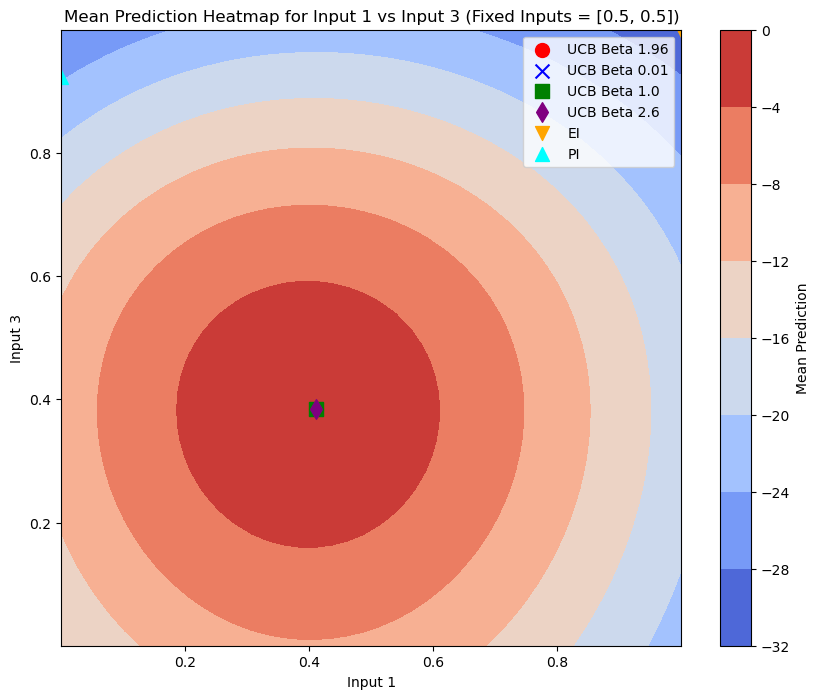

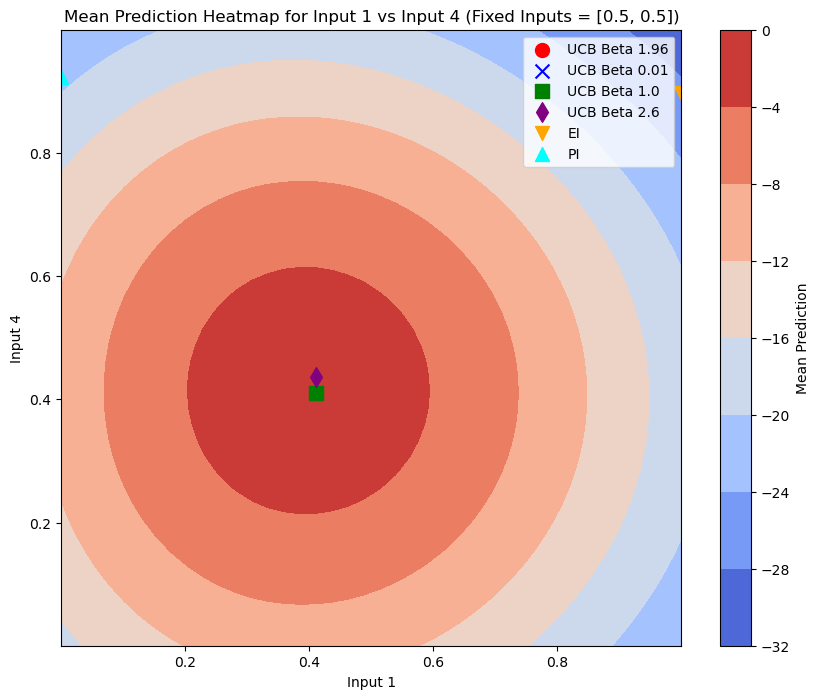

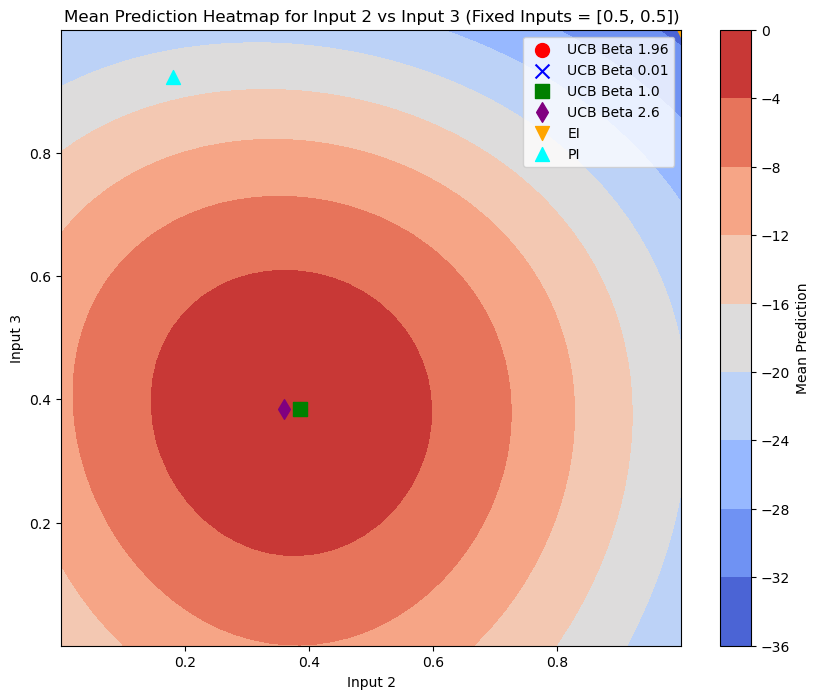

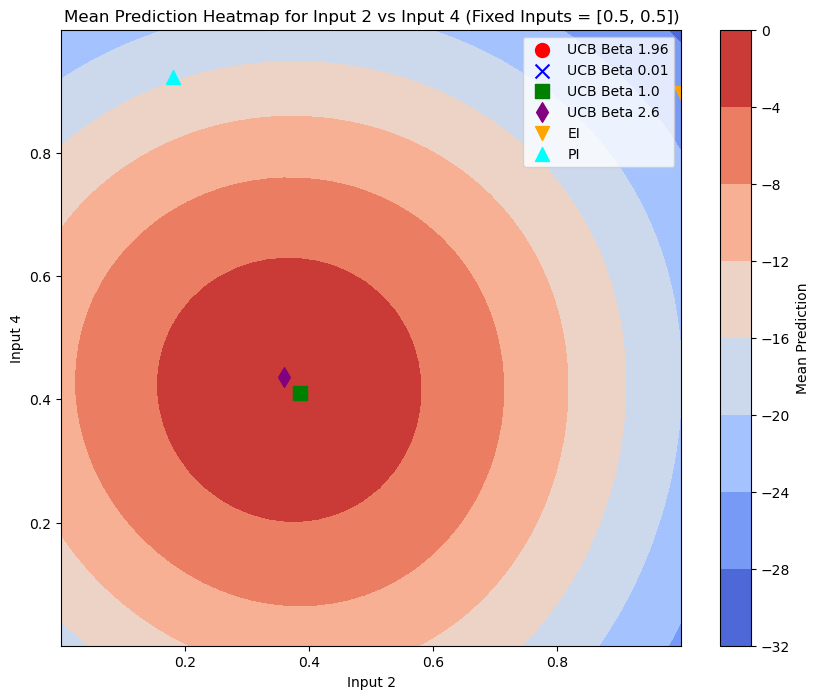

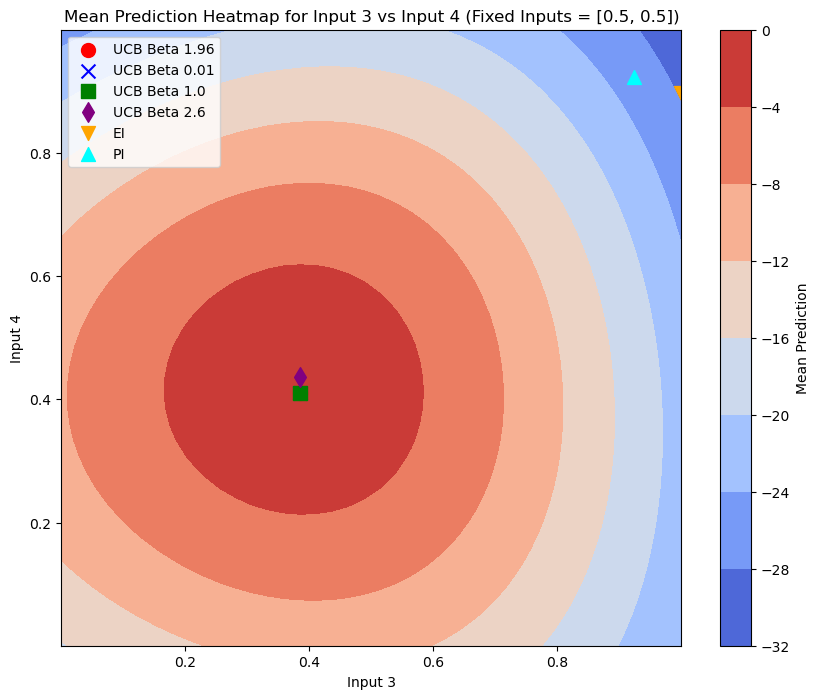

In [14]:
# Visualization function to include pairwise scatter plots and heatmaps
def visualize_data(X_original, y_original, X_grid, query_points, input_ranges):
    num_inputs = X_original.shape[1]
    
    # Pairwise scatter plots with color gradient and query points
    if num_inputs > 1:
        input_columns = X_original.columns
        pair_combinations = list(combinations(input_columns, 2))
        num_plots = len(pair_combinations)
        num_cols = 3
        num_rows = (num_plots + num_cols - 1) // num_cols

        fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 5))
        fig.tight_layout(pad=4.0)
        axes = axes.flatten()

        for i, (x_col, y_col) in enumerate(pair_combinations):
            ax = axes[i]
            scatter = ax.scatter(X_original[x_col], X_original[y_col], c=y_original.values.flatten(), cmap='viridis')
            ax.set_xlabel(x_col)
            ax.set_ylabel(y_col)
            ax.set_title(f'{x_col} vs {y_col}')
            
            for query, label, color, marker in query_points:
                ax.scatter(query[input_columns.get_loc(x_col)], query[input_columns.get_loc(y_col)], color=color, marker=marker, s=100, label=label)
            
            if i == num_plots - 1:
                fig.colorbar(scatter, ax=ax, orientation='vertical', fraction=.02)
        
        for j in range(i + 1, len(axes)):
            axes[j].axis('off')

        plt.legend()
        plt.show()

    # Generate heatmaps for all pairs of inputs
    for (i, j) in combinations(range(num_inputs), 2):
        fixed_input_values = [0.5] * (num_inputs - 2)
        fixed_indices = [k for k in range(num_inputs) if k != i and k != j]

        X_grid_fixed = generate_grid(input_ranges[:2], GG)
        X_grid_fixed_full = np.zeros((X_grid_fixed.shape[0], num_inputs))
        X_grid_fixed_full[:, [i, j]] = X_grid_fixed
        for idx, fixed_val in zip(fixed_indices, fixed_input_values):
            X_grid_fixed_full[:, idx] = fixed_val

        X_grid_fixed_full_df = pd.DataFrame(X_grid_fixed_full, columns=X_original.columns)
        X_grid_fixed_scaled = scaler_X.transform(X_grid_fixed_full_df)
        mean_fixed_scaled, std_fixed_scaled = GPR_model_best.predict(X_grid_fixed_scaled, return_std=True)
        mean_fixed = scaler_y.inverse_transform(mean_fixed_scaled.reshape(-1, 1)).flatten()

        plt.figure(figsize=(10, 8))
        plt.contourf(X_grid_fixed[:, 0].reshape(GG, GG), X_grid_fixed[:, 1].reshape(GG, GG), mean_fixed.reshape(GG, GG), cmap='coolwarm')
        plt.colorbar(label='Mean Prediction')
        
        for query, label, color, marker in query_points:
            plt.scatter(query[i], query[j], color=color, marker=marker, s=100, label=label)

        plt.title(f'Mean Prediction Heatmap for Input {i+1} vs Input {j+1} (Fixed Inputs = {fixed_input_values})')
        plt.xlabel(f'Input {i+1}')
        plt.ylabel(f'Input {j+1}')
        plt.legend()
        plt.show()

# Call the visualization function using the original data
visualize_data(X, y, X_grid, query_points, input_ranges)